### Heart Disease Prediction

In this machine learning project, I have collected the dataset from Kaggle datasets and i will be using the machine learning algorithms to predict wheather person has a chance of heart disease or not.

#### Dataset Description:

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [1]:
## Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.cm import rainbow
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Reading the dataset

df=pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
### Checking the Dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.shape

(1025, 14)

In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
### Describing the Statistical information about the given dataset

df.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
### Checking if our dataset have any null values

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

We can see that our dataset is clean and there is no any missing values present in the data so we further go to the feature selection part to check which features are important for analysis and prediction part 

### Performing the Feature Selection

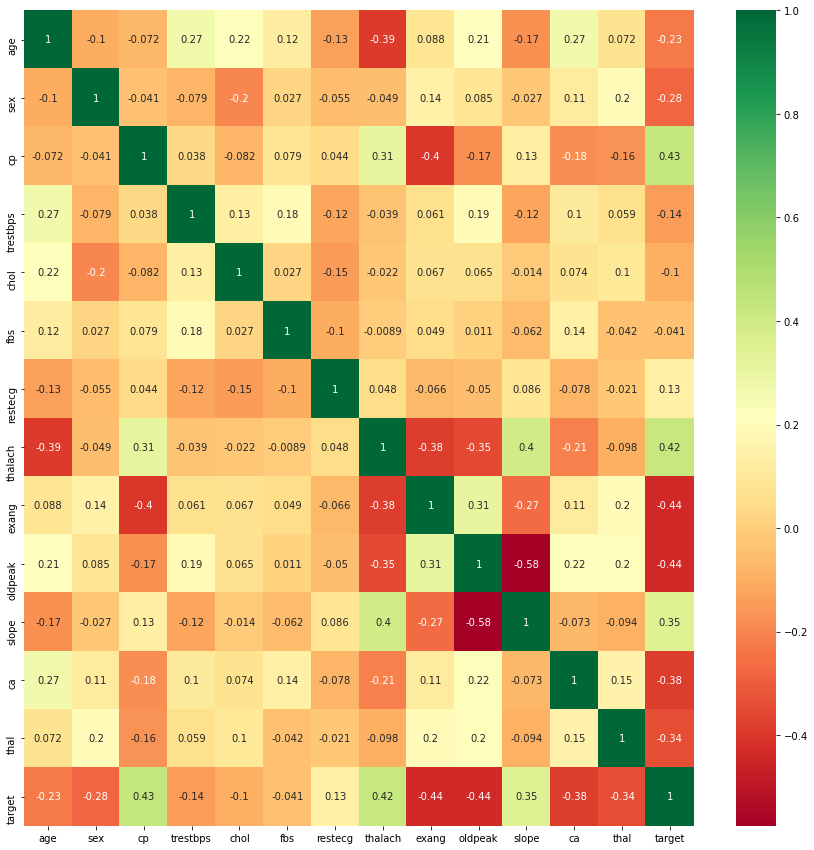

In [10]:
import seaborn as sns

## Get the correlations of each features in the dataset

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))

## plotting the heatmap to check the correlation between the variables

g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

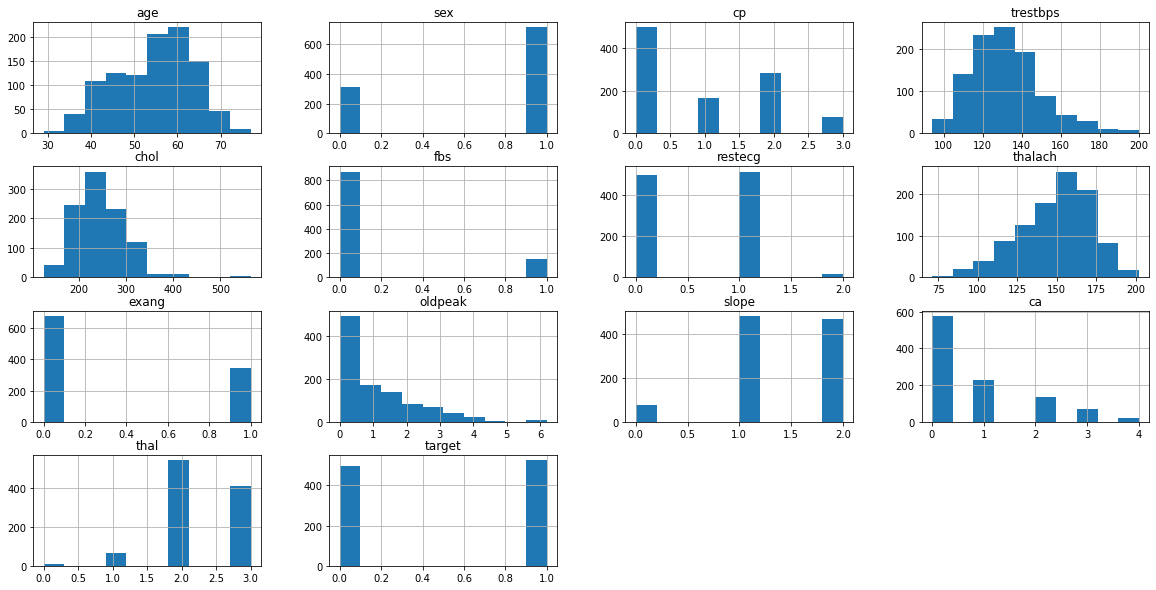

In [11]:
### Plot the histograms for the given dataset

df.hist(figsize=(20,10))

It's always a good practice to work with a dataset where the target classes are of approximately equal size. Thus let's check for the same

<Figure size 720x360 with 0 Axes>

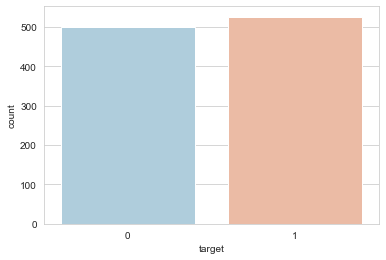

<Figure size 720x360 with 0 Axes>

In [12]:
### Plottin the countplot to check the target column

sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='RdBu_r')
plt.figure(figsize=(10,5))

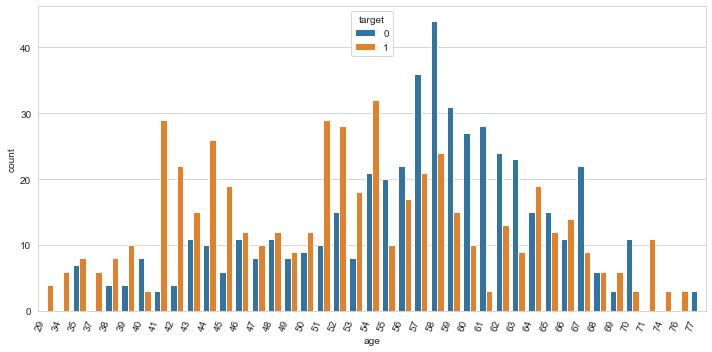

In [13]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="age", data=df,hue='target')

ax.set_xticklabels(ax.get_xticklabels(), rotation=70,size=10, ha="right")
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='trestbps', ylabel='age'>

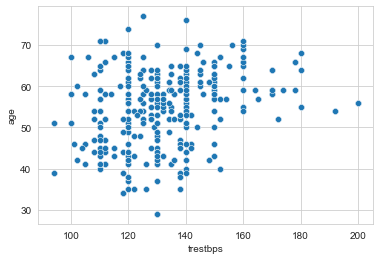

In [14]:
sns.scatterplot(x='trestbps',y='age',data=df)

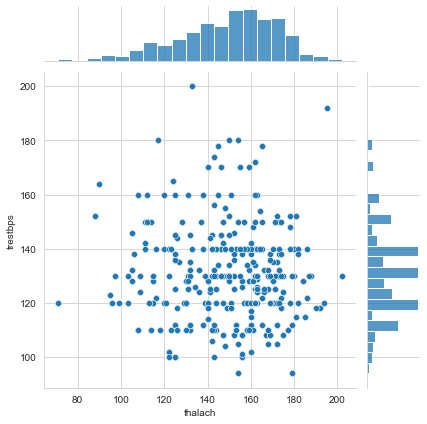

In [15]:
sns.jointplot(x='thalach',y='trestbps',data=df)

In [16]:
X= df.drop(['target'], axis = 1)
y = df['target']

In [17]:
## Now Split the given dataset into parts like training and test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [18]:
### Let us simplyfy our dataset using the Scalinng technique to get better accuracy

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_train
x_test=sc.transform(x_test)

In [26]:
x_train.shape

(820, 13)

In [27]:
x_test.shape

(205, 13)

### Building a model to predict the heart disease 

Till now we did data preprocessing and data analysis part to understand the insights in the dataset now let us predict the model using Machine learning algorithms 

#### Let us build a model using KNN algorithm

In [19]:
## Applying the KNN algorithm
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

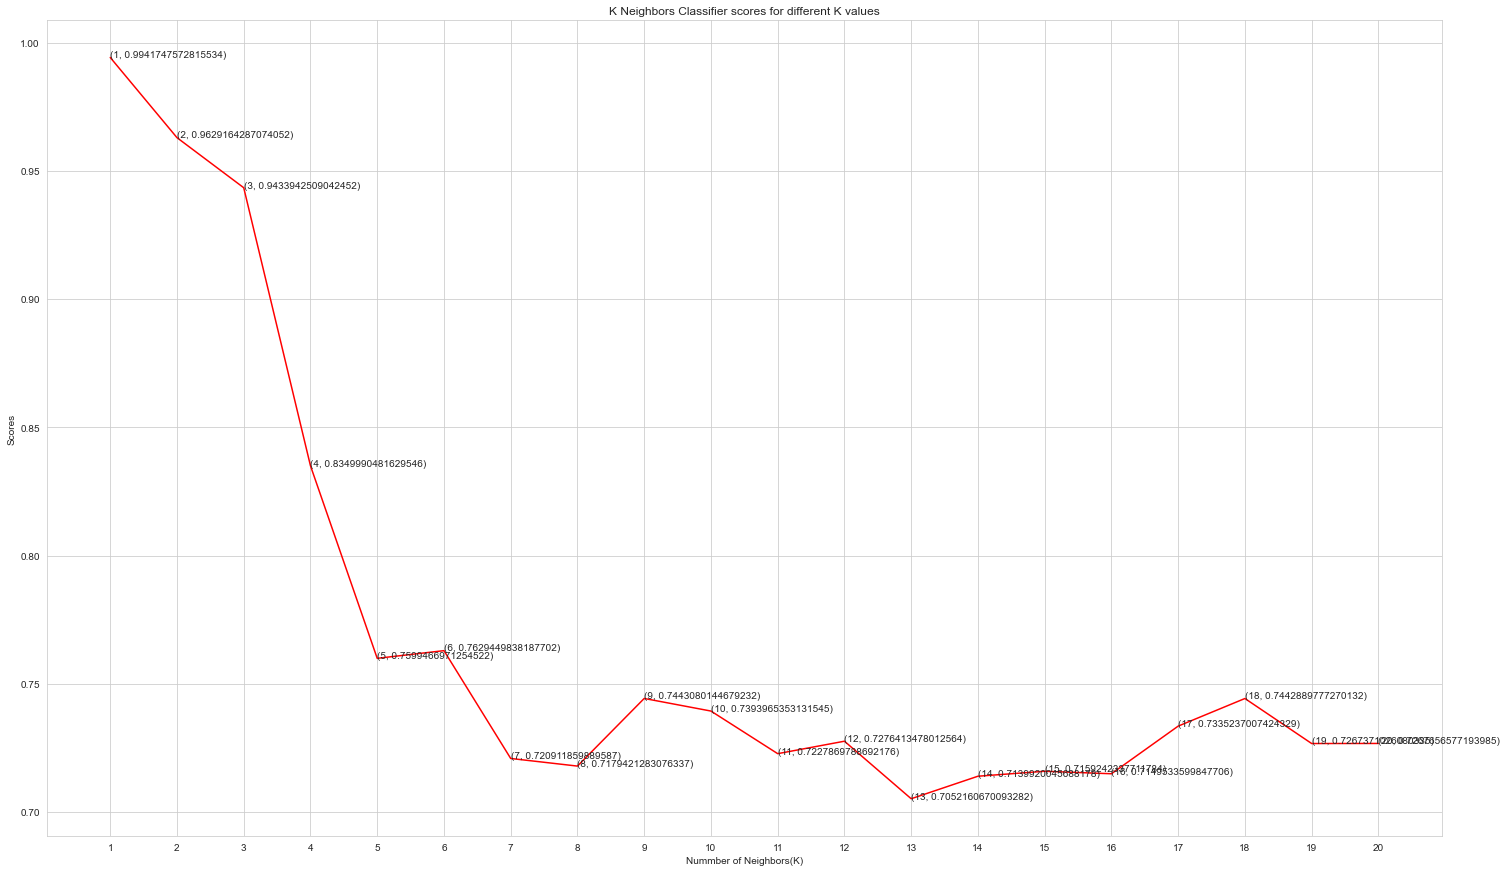

In [20]:
## Let us plot the line graph for K=21 neighbour and check the best k value
plt.figure(figsize=(25,15))
plt.plot([k for k in range(1,21)], knn_scores, color='red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1],(i,knn_scores[i-1]))
plt.xticks([i for i in range(1,21)])
plt.xlabel('Nummber of Neighbors(K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [21]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
score = cross_val_score(knn_classifier,X,y,cv=10)
score.mean()

0.9433942509042452

In [22]:
knn_classifier = KNeighborsClassifier(n_neighbors = 9, metric = 'manhattan', p = 1)
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=9, p=1)

In [23]:
y_pred = knn_classifier.predict(x_test)

<AxesSubplot:>

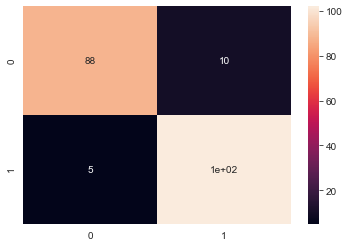

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [29]:
from sklearn import metrics

print("Accuracy=",metrics.accuracy_score(y_test,y_pred))
print("Precision=",metrics.precision_score(y_test,y_pred))
print("Recall=",metrics.recall_score(y_test,y_pred))

Accuracy= 0.926829268292683
Precision= 0.9107142857142857
Recall= 0.9532710280373832


#### let us check the model using the Gradient boosting Algorithm

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

GB=GradientBoostingClassifier(learning_rate=0.01,random_state=0)
GB.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=0)

#### Checking the Accuracy of Gradient boosting after applying to the model

In [31]:
GB.score(x_test,y_test)

0.8975609756097561

#### Checking the model performance using the Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
logisticRegr.fit(x_train,y_train)

LogisticRegression()

In [33]:
predictions=logisticRegr.predict(x_test)

#### Checking the accuracy of the model after applying Logistic regression

In [34]:
score=logisticRegr.score(x_test,y_test)
score

0.8634146341463415

#### Checking the model performance by using Random forest 

In [42]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=6,n_jobs=2)
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=6, n_jobs=2)

In [43]:
y_pred=rfc.predict(x_test)

In [44]:
cm = confusion_matrix(y_pred,y_test)
cm

array([[ 96,   0],
       [  2, 107]], dtype=int64)

In [45]:
print("Accuracy=",metrics.accuracy_score(y_test,y_pred))
print("Precision=",metrics.precision_score(y_test,y_pred))
print("Recall=",metrics.recall_score(y_test,y_pred))

Accuracy= 0.9902439024390244
Precision= 0.981651376146789
Recall= 1.0


In [46]:
from sklearn.svm import SVC

model= SVC(kernel='linear')

In [47]:
model.fit(x_train,y_train)

SVC(kernel='linear')

In [48]:
model.score(x_test,y_test)

0.8536585365853658

#### Checking the performance of a model using the Decision tree 

In [49]:
from sklearn.tree import DecisionTreeClassifier

DTC= DecisionTreeClassifier(criterion='entropy',random_state=40,max_depth=3,min_samples_leaf=5)
DTC.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=40)

In [50]:
y_pred_en= DTC.predict(x_test)

In [51]:
from sklearn import metrics

print("Accuracy=",metrics.accuracy_score(y_test, y_pred_en))
print("Precision=",metrics.precision_score(y_test,y_pred_en))
print("Recall=",metrics.recall_score(y_test,y_pred_en))

Accuracy= 0.8439024390243902
Precision= 0.8440366972477065
Recall= 0.8598130841121495


In [52]:
import pickle

pickle.dump(knn_classifier,open('model.pkl','wb'))
pickle.dump(sc, open('sc.pkl','wb'))